In [1]:
#借助 Intel(R) Extension for Scikit-learn，您可以加速您的 Scikit-learn 应用程序，并且仍然完全符合所有 Scikit-Learn API 和算法。这是一款免费软件 AI 加速器，可为各种应用带来超过10-100 倍的加速。而且您甚至不需要更改现有代码！
# !python -m pip install pandas matplotlib scikit-learn-intelex scikit-learn openpyxl tensorboard seaborn ipykernel ipywidgets keras plotly plotly_express
# !python -m pip install  tensorflow==2.15.*
# !python -m pip install  tensorflow[and-cuda]==2.15.*
#


In [2]:
# 本导入顺序可以看到类型
import tensorflow as tf
import keras
# import tensorflow_datasets as tfds
import datetime
import os
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
from sklearn import preprocessing as skl
from sklearn.model_selection import train_test_split

# from tensorflow import keras

from keras import layers
from keras import models



patch_sklearn()
# from attention_utils import get_activations

#更好地兼容 Python 3 的行为和特性，使得代码可以在 Python 2 和 Python 3 下运行得更加一致
# from __future__ import absolute_import,division,print_function,unicode_literals
from matplotlib import pyplot as plt
from matplotlib import ticker as mt
# 或者直接指定字体文件路径
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans Mono']  # 系统自带的黑体
plt.rcParams['font.serif'] = ['SimHei']  # 系统自带的宋体
plt.rcParams['font.family'] = [
    'SimHei',
    'DejaVu Sans Mono',  # 显示负号的字体
    # 'Liberation Mono',
    'Consolas',
    'Courier New',
    'monospace',
    'sans-serif',
    'serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
    'sans-serif',
    'sans',
    'serif',
]
plt.rcParams['axes.unicode_minus'] = False  # 设置matplotlib显示正常的负号而非减号样式

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
print(' ')
print(f'{datetime.datetime.now()} tensorflow版本:', tf.__version__)
gpus = tf.config.experimental.list_physical_devices("GPU")
print(' ')
print('gpus： ')
print(gpus)
print(' ')
print('gpus')
# 查看系统中可见的GPU设备
print("Available GPU devices:", tf.config.list_physical_devices("GPU"))


 
2024-04-22 10:45:42.515928 tensorflow版本: 2.16.1
 
gpus： 
[]
 
gpus
Available GPU devices: []


In [4]:
# # 读取数据

from load_data import load_fixed_data, categories

R_CREATE = False
R_CREATE = True


def create_dynamic_globals(dyn_name, value, global_vars, read_cache: bool = True):
    """
    :param dyn_name: 动态变量名
    :param value: 动态变量值
    :param global_vars: 全局变量字典
    :return:
    """
    # print(dyn_name, global_vars[dyn_name])
    if read_cache and (R_CREATE or dyn_name not in global_vars or global_vars[dyn_name] == None):
        # 如果确实需要在全局作用域创建真正的全局变量，可以使用exec，但这不是推荐做法
        if callable(value):

            v = value(dyn_name)
            s = f'global {dyn_name}; {dyn_name} = v'
            # print(s)
            exec(s)
        else:
            exec(f'global {dyn_name}; {dyn_name} = {value}')

    return globals()[dyn_name]


def create_global_vars(global_vars, varprefix: str = 'data_', read_cache: bool = True):

    for gvar in global_vars:
        #
        if gvar.startswith('_'):
            continue
        if gvar.startswith(varprefix):
            print(gvar, )
            create_dynamic_globals(gvar, lambda f: load_fixed_data(f'./data/{f}.xlsx'), global_vars)


data_17 = pd.DataFrame()
data_21 = data_17
data_22 = data_17
data_23 = data_17
data_24 = data_17

create_global_vars(globals(), varprefix='data_')

# data_17.dtypes

data_17
data_21
data_22
data_23
data_24


In [5]:
from libs.config import *

In [6]:
#组合数据集
from load_data import categories

numeric_col_names = [
    '原始重量', '稳定重量', '轴重', 'su_ad', 'wpu_x', 'wpu_y', 'wpu_z', 'su_x', 'su_y', 'su_z', '原始重量_diff', '稳定重量_diff', '轴重_diff', 'su_ad_diff', 'wpu_x_diff', 'wpu_y_diff', 'wpu_z_diff', 'su_x_diff', 'su_y_diff', 'su_z_diff', '速度', '估计重量'
]
# delete some
# ['Unnamed: 0' ,
# 'label'      , '时间'         , '轨迹时间'       , '速度',, '估计重量'
# '原始重量'       , '稳定重量'       , '轴重'         , 'su_ad',
# '原始重量_diff'  , '稳定重量_diff'  , '轴重_diff'    , 'su_ad_diff',
# 'wpu_x'      , 'wpu_y'      , 'wpu_z'      ,
# 'wpu_x_diff' , 'wpu_y_diff' , 'wpu_z_diff',
# 'su_x'       , 'su_y'       , 'su_z'       ,
# 'su_x_diff'  , 'su_y_diff'  , 'su_z_diff'
# ]
label_col_names = ["label"]
time_col_names = ["时间", "轨迹时间"]
feature_col_names = numeric_col_names  # 暂时去掉 时间
feature_col_num = len(feature_col_names)

class_num = len(categories)


all_col_names = numeric_col_names + label_col_names + time_col_names
df17, df21, df22, df23, df24 = data_17[all_col_names], data_21[all_col_names], data_22[all_col_names], data_23[all_col_names], data_24[all_col_names]
origindata = pd.concat([df17, df21, df22, df23, df24], axis=0, ignore_index=True)

# print(origindata.columns)

print(origindata.shape, origindata.columns, origindata.dtypes)

(107420, 25) Index(['原始重量', '稳定重量', '轴重', 'su_ad', 'wpu_x', 'wpu_y', 'wpu_z', 'su_x',
       'su_y', 'su_z', '原始重量_diff', '稳定重量_diff', '轴重_diff', 'su_ad_diff',
       'wpu_x_diff', 'wpu_y_diff', 'wpu_z_diff', 'su_x_diff', 'su_y_diff',
       'su_z_diff', '速度', '估计重量', 'label', '时间', '轨迹时间'],
      dtype='object') 原始重量                   int64
稳定重量                   int64
轴重                     int64
su_ad                  int64
wpu_x                  int64
wpu_y                  int64
wpu_z                  int64
su_x                   int64
su_y                   int64
su_z                   int64
原始重量_diff              int64
稳定重量_diff              int64
轴重_diff                int64
su_ad_diff             int64
wpu_x_diff             int64
wpu_y_diff             int64
wpu_z_diff             int64
su_x_diff              int64
su_y_diff              int64
su_z_diff              int64
速度                   float64
估计重量                 float64
label                  int64
时间            date

In [7]:
# check 数据集有缺失值
shapea= origindata.shape
df = origindata.dropna()
shapeb =df.shape
print(shapea, shapeb)
if shapea != shapeb:
    print(shapea,shapeb)
    ValueError("数据集有缺失值")

# missing_values

(107420, 25) (107420, 25)


In [8]:
import pandas as pd

# 假设df是一个时间序列DataFrame，其中索引是时间戳
if not '时间' in df.index.names or not isinstance(df.index, pd.DatetimeIndex):
    df.sort_values('时间', axis=0, ascending=True)
    df.set_index('时间', inplace=True)  # 如果还没有将时间戳设为索引
    df = df.sort_index(axis=0, ascending=True)
# df.interpolate(method='linear', inplace=True)
# 确保索引已经是datetime类型
# df.index = pd.to_datetime(df.index)

# 计算相邻时间点之间的差值
time_diffs = df.index.to_series(name='timespan').diff()
print(time_diffs)
# 找出那些间隔超过3秒的索引
large_gaps = time_diffs[time_diffs > pd.Timedelta(seconds=6)].index
print(large_gaps)
# 若要查看每段连续的间隔超过3秒的区间
gaps_df = pd.DataFrame({'start': large_gaps[:-1], 'end': large_gaps[1:]})
# 若只需要每个间隔的开始时间
gap_starts = large_gaps[:-1]

print("间隔超过3秒的开始时间点：", gap_starts)
time_diffs

时间
2023-12-17 09:39:23               NaT
2023-12-17 09:39:26   0 days 00:00:03
2023-12-17 09:39:30   0 days 00:00:04
2023-12-17 09:39:32   0 days 00:00:02
2023-12-17 09:39:35   0 days 00:00:03
                            ...      
2023-12-24 08:27:37   0 days 00:00:03
2023-12-24 08:27:40   0 days 00:00:03
2023-12-24 08:27:43   0 days 00:00:03
2023-12-24 08:27:46   0 days 00:00:03
2023-12-24 08:27:49   0 days 00:00:03
Name: timespan, Length: 107420, dtype: timedelta64[ns]
DatetimeIndex(['2023-12-17 09:40:23', '2023-12-17 09:41:38',
               '2023-12-17 09:44:20', '2023-12-17 09:55:29',
               '2023-12-17 10:34:53', '2023-12-17 10:36:20',
               '2023-12-17 10:40:27', '2023-12-17 10:47:24',
               '2023-12-17 10:53:02', '2023-12-17 10:53:24',
               ...
               '2023-12-23 17:13:36', '2023-12-23 17:14:55',
               '2023-12-23 17:16:18', '2023-12-23 17:17:34',
               '2023-12-23 17:18:42', '2023-12-23 17:20:13',
               '2

时间
2023-12-17 09:39:23               NaT
2023-12-17 09:39:26   0 days 00:00:03
2023-12-17 09:39:30   0 days 00:00:04
2023-12-17 09:39:32   0 days 00:00:02
2023-12-17 09:39:35   0 days 00:00:03
                            ...      
2023-12-24 08:27:37   0 days 00:00:03
2023-12-24 08:27:40   0 days 00:00:03
2023-12-24 08:27:43   0 days 00:00:03
2023-12-24 08:27:46   0 days 00:00:03
2023-12-24 08:27:49   0 days 00:00:03
Name: timespan, Length: 107420, dtype: timedelta64[ns]

In [9]:
from turtle import up
import scipy
from scipy.stats import iqr

p = 1.5


def replace_iqr_outliers(df: pd.DataFrame, colums: list[str]):
    q = 0.25
    _df = df.copy()
    for column in colums:
        _df[column] = _df[column].astype(float)
        q1 = _df[column].quantile(q)  #.quantile(0.25)
        q3 = _df[column].quantile(1 - q)  #.quantile(0.75)
        iqr_value = iqr(_df[column], rng=(q * 100, (1 - q) * 100))
        print('------', iqr_value)

        lower_bound = q1 - p * iqr_value
        upper_bound = q3 + p * iqr_value
        _df.loc[_df[column] < lower_bound, column] = lower_bound
        _df.loc[_df[column] > upper_bound, column] = upper_bound

    return _df


df_iqr = replace_iqr_outliers(origindata, numeric_col_names)

df_iqr


------ 8295.0
------ 0.0
------ 8295.0
------ 745.0
------ 1635.0
------ 814.25
------ 1674.0
------ 1148.0
------ 796.0
------ 1006.0
------ 312.0
------ 0.0
------ 312.0
------ 28.0
------ 23.0
------ 26.0
------ 23.0
------ 10.0
------ 10.0
------ 10.0
------ 0.0
------ 0.0


,原始重量,稳定重量,轴重,su_ad,wpu_x,wpu_y,wpu_z,su_x,su_y,su_z,...,wpu_y_diff,wpu_z_diff,su_x_diff,su_y_diff,su_z_diff,速度,估计重量,label,时间,轨迹时间
0,-4063.0,0.0,-4375.0,33161.0,13662.0,326.000,76328.0,1867.0,-1010.0,87720.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-12-17 09:39:23,2023-12-17 09:39:28
1,-4175.0,0.0,-4364.0,33160.0,13636.0,327.000,76355.0,1867.0,-1010.0,87720.0,...,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0,2023-12-17 09:39:26,2023-12-17 09:39:28
2,-4575.0,0.0,-4486.0,33171.0,13649.0,312.000,76342.0,1867.0,-1005.0,87725.0,...,-15.0,-13.0,0.0,5.0,5.0,0.0,0.0,0,2023-12-17 09:39:30,2023-12-17 09:39:38
3,-4330.0,0.0,-4397.0,33163.0,13649.0,314.000,76342.0,1867.0,-999.0,87731.0,...,2.0,0.0,0.0,6.0,6.0,0.0,0.0,0,2023-12-17 09:39:32,2023-12-17 09:39:38
4,-4442.0,0.0,-4475.0,33170.0,13648.0,314.000,76343.0,1873.0,-1005.0,87720.0,...,0.0,1.0,6.0,-6.0,-11.0,0.0,0.0,0,2023-12-17 09:39:35,2023-12-17 09:39:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107415,-5488.0,0.0,-5433.0,33256.0,13777.0,666.375,76045.0,1790.0,-1743.0,86396.0,...,6.0,-4.0,5.0,6.0,6.0,0.0,0.0,0,2023-12-24 08:27:37,2023-12-24 08:27:43
107416,-5410.0,0.0,-5399.0,33253.0,13773.0,666.375,76048.0,1790.0,-1743.0,86401.0,...,3.0,3.0,0.0,0.0,5.0,0.0,0.0,0,2023-12-24 08:27:40,2023-12-24 08:27:43
107417,-5499.0,0.0,-5344.0,33248.0,13766.0,666.375,76054.0,1785.0,-1743.0,86390.0,...,11.0,6.0,-5.0,-6.0,-11.0,0.0,0.0,0,2023-12-24 08:27:43,2023-12-24 08:27:43
107418,-5433.0,0.0,-5466.0,33259.0,13790.0,666.375,76033.0,1785.0,-1743.0,86390.0,...,-17.0,-21.0,0.0,6.0,0.0,0.0,0.0,0,2023-12-24 08:27:46,2023-12-24 08:27:47


In [10]:
from libs.expandrows import dataframe_filter

df_filter_important = df_iqr  #全部数据

# df_filter_important = dataframe_filter(df_iqr, 30)  # 过滤为0的数据

# df_filter_important

In [11]:
# 使用Savitzky-Golay 滤波器后得到平滑图线
from numpy import ndarray
from scipy import signal as sg

# df_expanded = df_expanded  #.dropna()
for col in df_filter_important[numeric_col_names].columns:
    a = 1
    # df_selected.insert(0,co)
    # df_selected[col] = sg.savgol_filter(df_selected[col].astype(float), window_length=21, delta=0.5, polyorder=1, mode='constant')
    # df_selected[col] = np.convolve(df_selected[col].astype(float), np.ones((5, )), mode='same')
    # df_selected[col] = abs(df_selected[col].astype(float))
    # df_selected[col] = np.convolve(df_selected[col].astype(float), np.ones((5, )), mode='same')

# df_selected.sort_index(axis=1)

# df_selected = df_selected.apply(lambda x: savgol_filter(x, 5, 3, mode= 'nearest'))
#[feature_col_names + label_col_names]

df_smooth = df_filter_important[feature_col_names + label_col_names + time_col_names]


In [12]:
# !python -m pip install plotly plotly_express chart-studio cufflinks pyarrow
import plotly_express as px  # import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.subplots import make_subplots
# Cufflinks wrapper on plotly
import cufflinks as cf


# print(df['时间'].shape, df[feature_col_names].shape)
# fig = px.line(df, x='时间', y=feature_col_names + label_col_names,range_x=['2023-12-24 00:00:00', '2023-12-24 09:00:00'])
# fig.show()

In [13]:
# 假设你有多个列需要比较
columns_to_plot = feature_col_names + label_col_names
# df_smooth.reset_index()
df_to_plot = df_smooth[columns_to_plot]
# dfview.reset_index(drop=True, inplace=True)
df_to_plot

,原始重量,稳定重量,轴重,su_ad,wpu_x,wpu_y,wpu_z,su_x,su_y,su_z,...,su_ad_diff,wpu_x_diff,wpu_y_diff,wpu_z_diff,su_x_diff,su_y_diff,su_z_diff,速度,估计重量,label
0,-4063.0,0.0,-4375.0,33161.0,13662.0,326.000,76328.0,1867.0,-1010.0,87720.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-4175.0,0.0,-4364.0,33160.0,13636.0,327.000,76355.0,1867.0,-1010.0,87720.0,...,-1.0,-26.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0
2,-4575.0,0.0,-4486.0,33171.0,13649.0,312.000,76342.0,1867.0,-1005.0,87725.0,...,11.0,13.0,-15.0,-13.0,0.0,5.0,5.0,0.0,0.0,0
3,-4330.0,0.0,-4397.0,33163.0,13649.0,314.000,76342.0,1867.0,-999.0,87731.0,...,-8.0,0.0,2.0,0.0,0.0,6.0,6.0,0.0,0.0,0
4,-4442.0,0.0,-4475.0,33170.0,13648.0,314.000,76343.0,1873.0,-1005.0,87720.0,...,7.0,-1.0,0.0,1.0,6.0,-6.0,-11.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107415,-5488.0,0.0,-5433.0,33256.0,13777.0,666.375,76045.0,1790.0,-1743.0,86396.0,...,-12.0,2.0,6.0,-4.0,5.0,6.0,6.0,0.0,0.0,0
107416,-5410.0,0.0,-5399.0,33253.0,13773.0,666.375,76048.0,1790.0,-1743.0,86401.0,...,-3.0,-4.0,3.0,3.0,0.0,0.0,5.0,0.0,0.0,0
107417,-5499.0,0.0,-5344.0,33248.0,13766.0,666.375,76054.0,1785.0,-1743.0,86390.0,...,-5.0,-7.0,11.0,6.0,-5.0,-6.0,-11.0,0.0,0.0,0
107418,-5433.0,0.0,-5466.0,33259.0,13790.0,666.375,76033.0,1785.0,-1743.0,86390.0,...,11.0,24.0,-17.0,-21.0,0.0,6.0,0.0,0.0,0.0,0


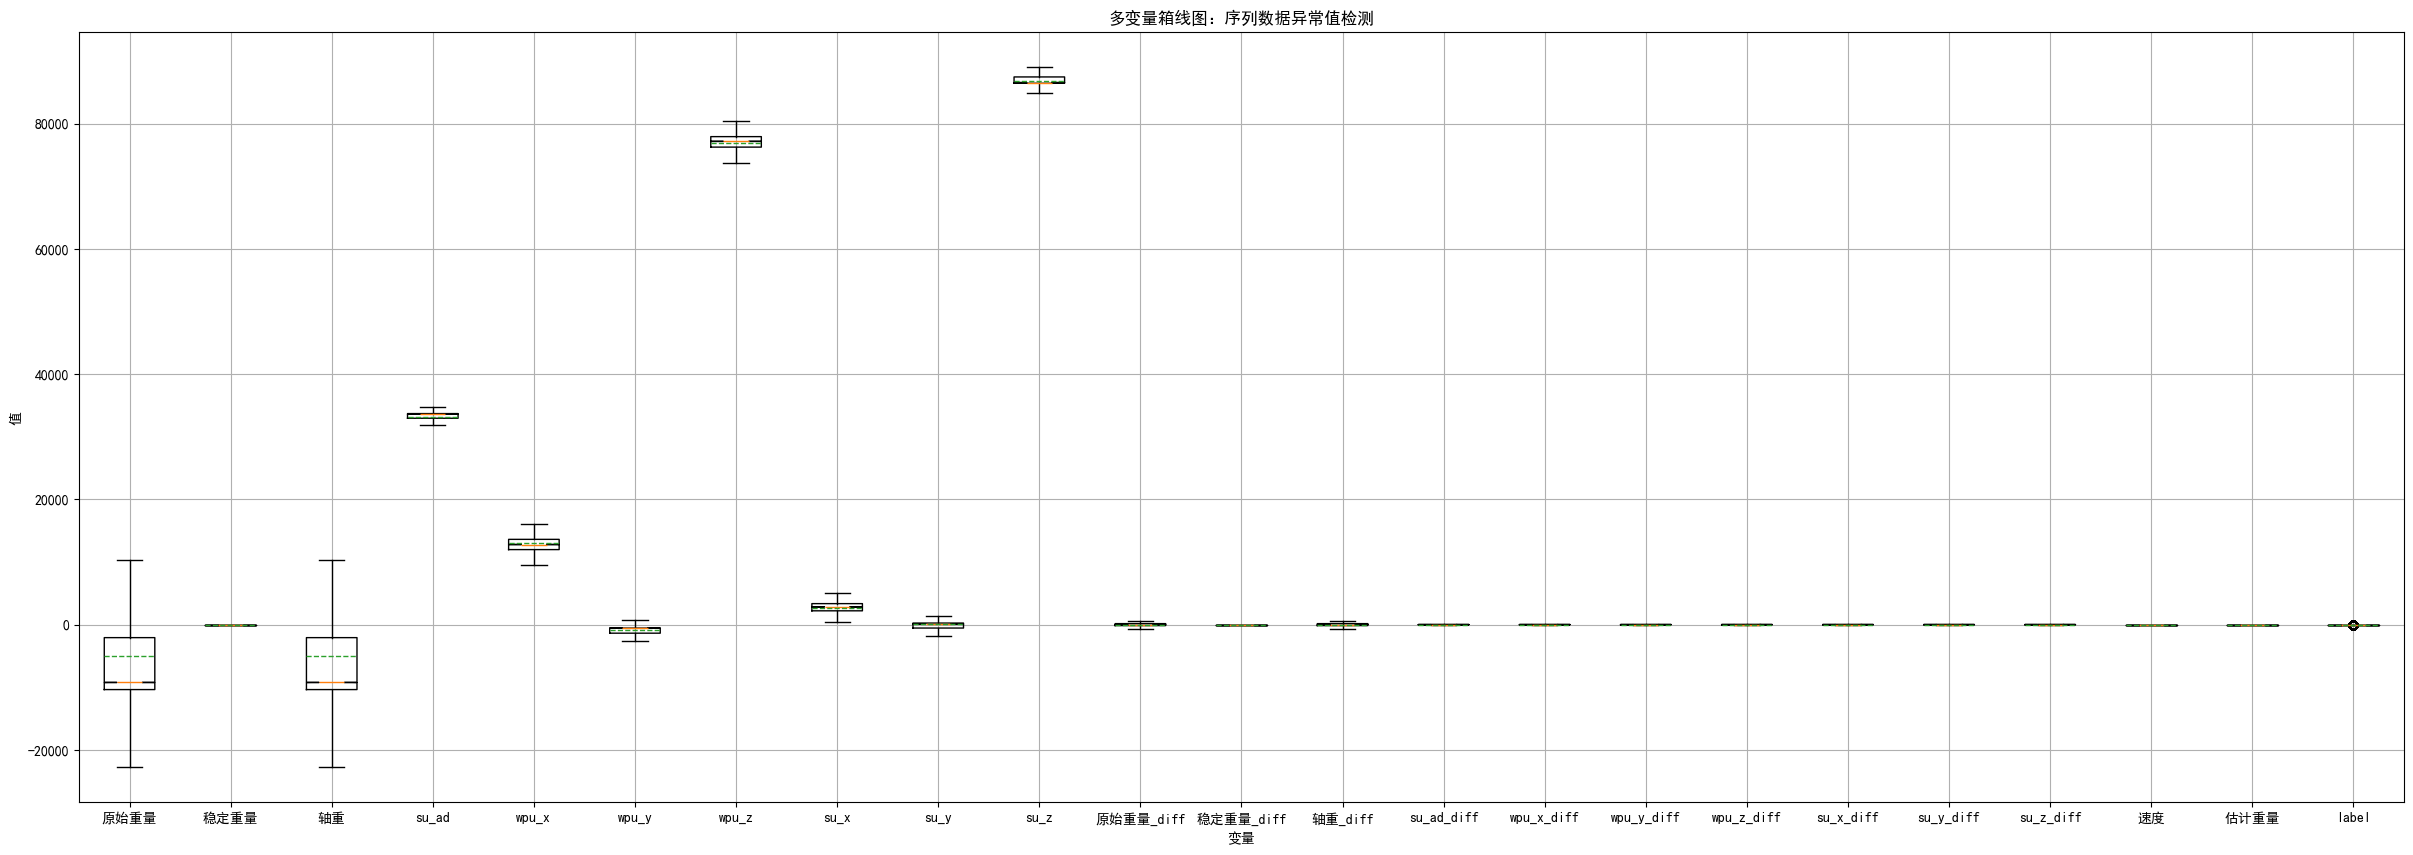

In [14]:
import matplotlib.pyplot as plt

# 绘制多变量箱线图
plt.figure(figsize=(30, 10))
plt.boxplot([df_to_plot[col] for col in columns_to_plot], labels=columns_to_plot, notch=True, showmeans=True, meanline=True, showfliers=True, whis=p)
plt.title('多变量箱线图：序列数据异常值检测')
plt.xlabel('变量')
plt.ylabel('值')
plt.grid(True)

plt.show()

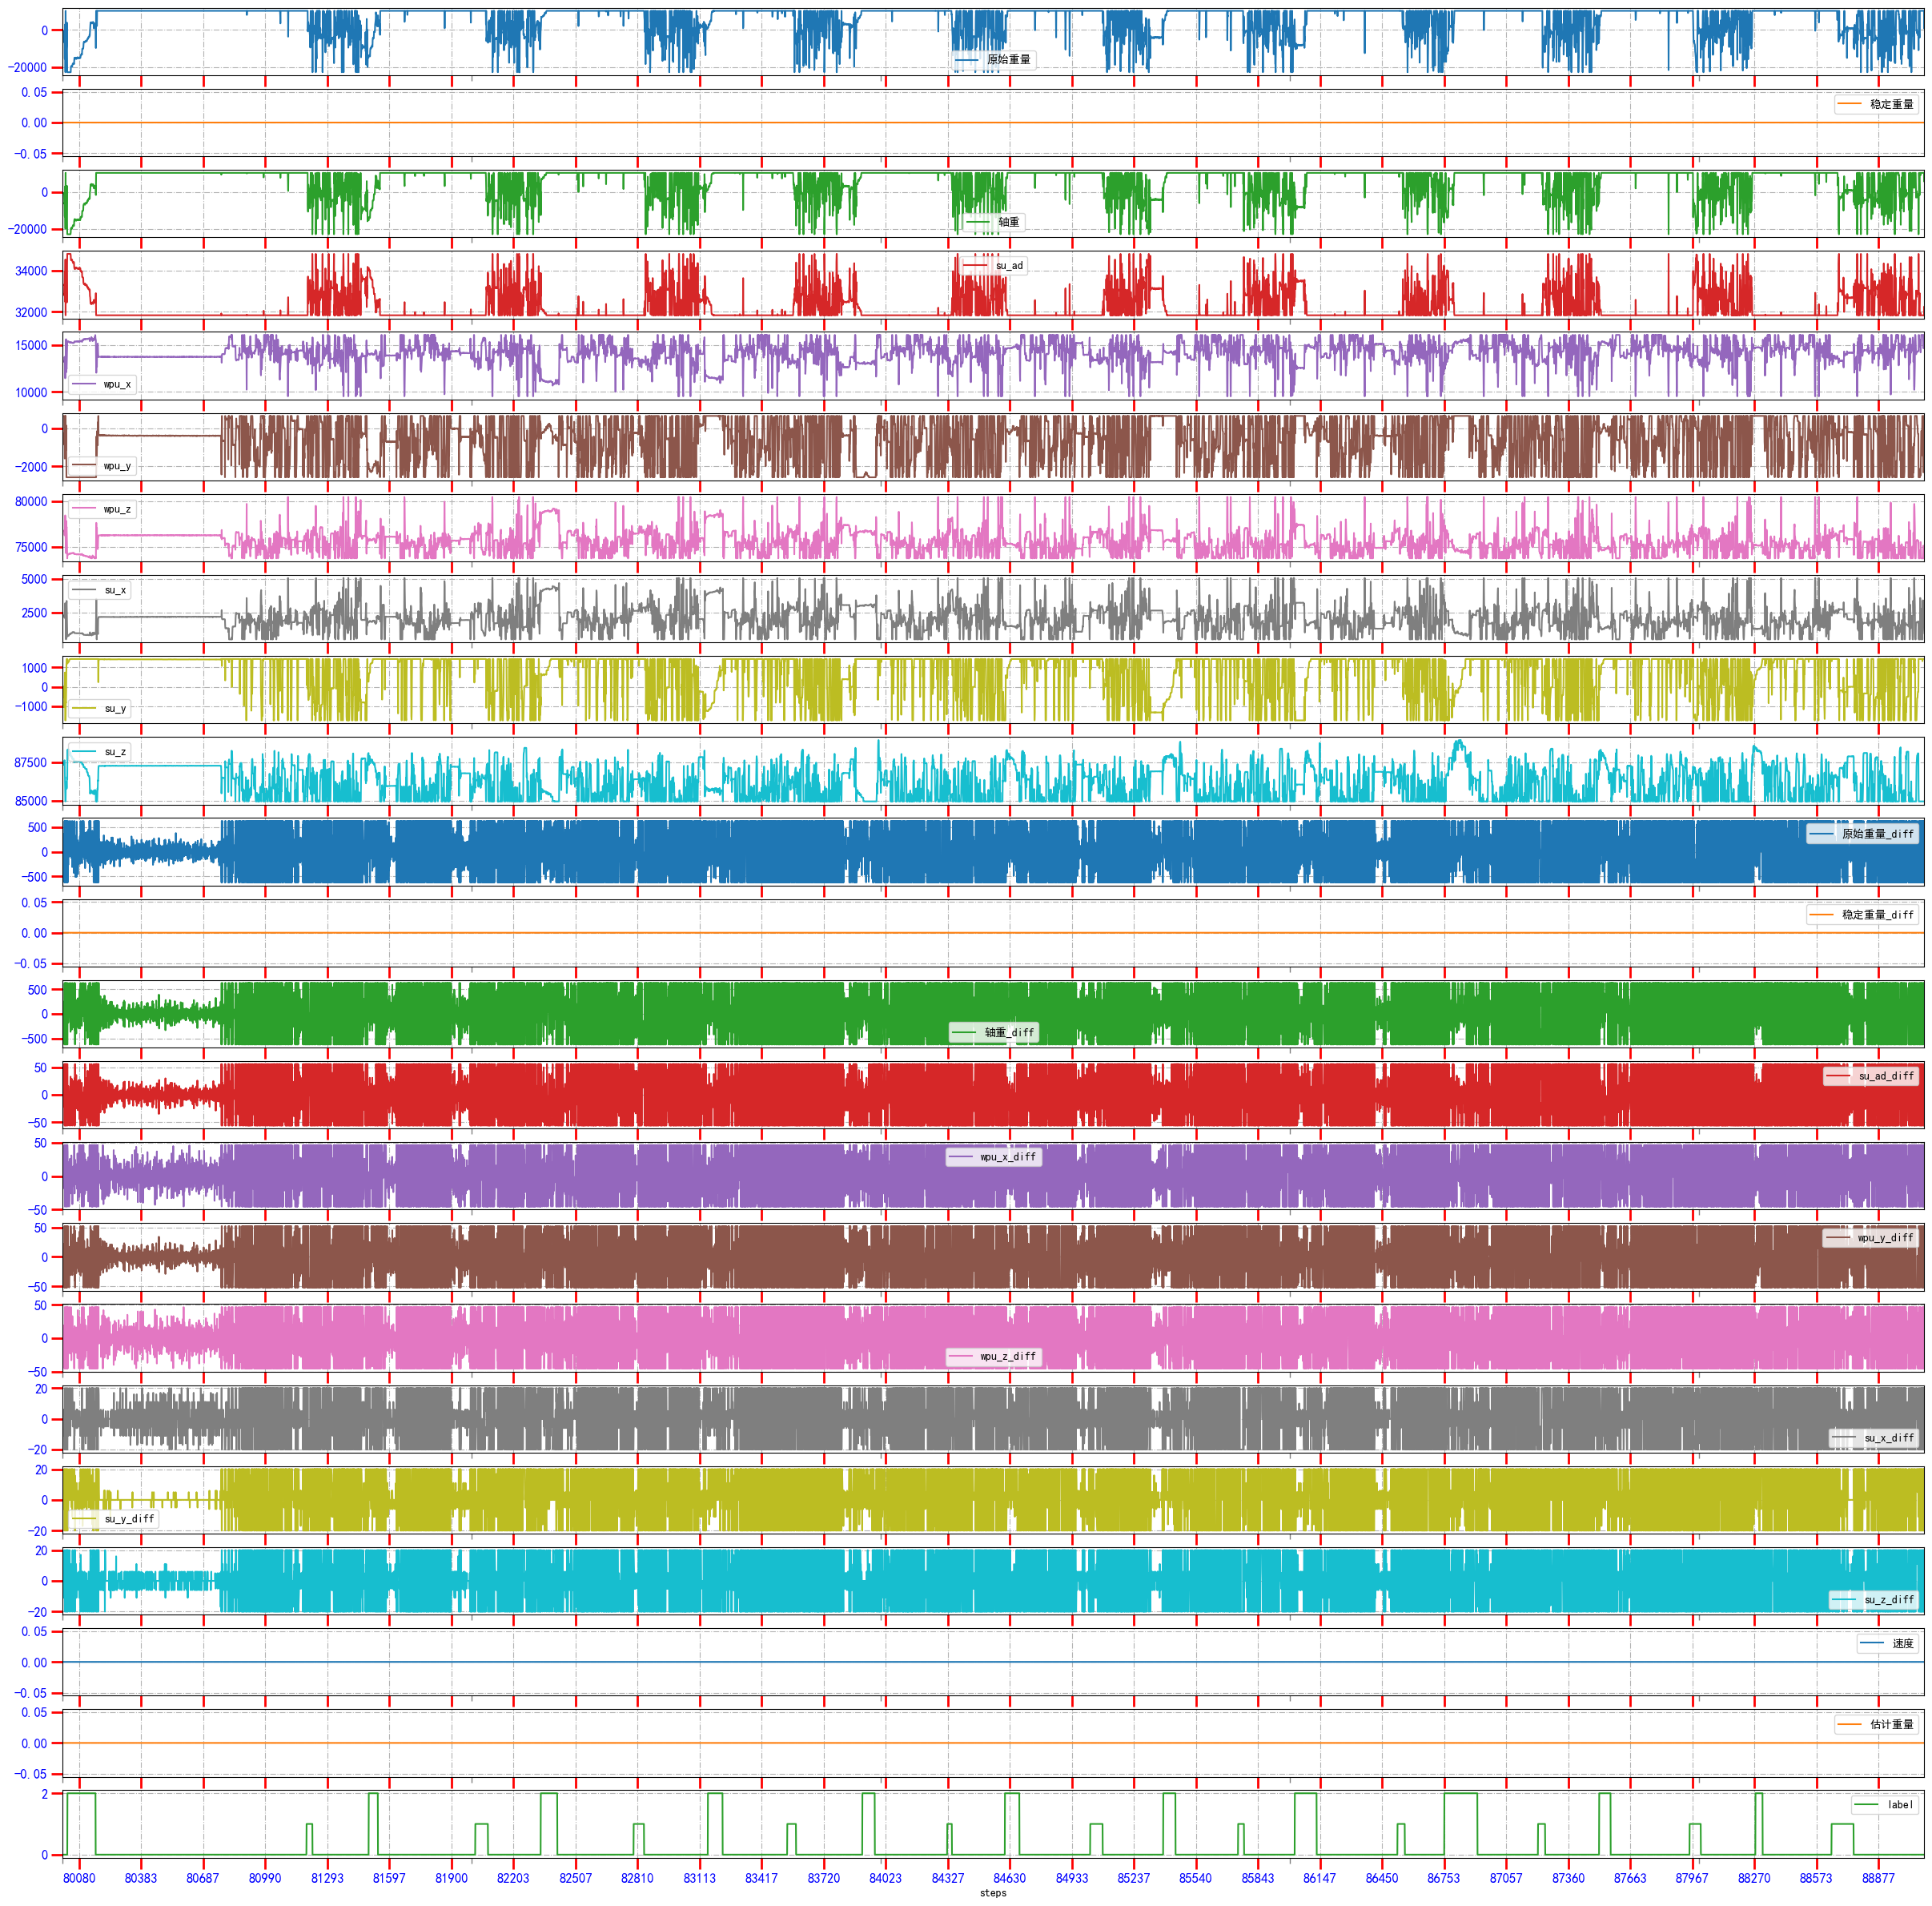

In [15]:
axes: list[plt.Axes] = df_to_plot.plot(legend=True, subplots=True, figsize=(30, 30), xlabel="steps")
for ax in axes:
    # 设置主刻度线和标签的属性
    ax.tick_params(which='major', length=10, width=2, colors='red', labelsize=12, labelcolor='blue')
    # 设置副刻度线和标签的属性
    ax.tick_params(which='minor', length=5, width=1, colors='gray', labelsize=10, labelcolor='gray')
    ax.grid(True, linestyle='-.', color='0.7')  # 自定义网格线样式
    ax.set_xlim(left=80000, right=89100)
    min, max = ax.get_xlim()
    ax.xaxis.set_major_locator(mt.MultipleLocator((max - min) / 30))
    # ax.xaxis.set_minor_locator(mt.AsinhLocator(base=round((max - min) // 30), linear_width=1))
plt.show()


In [16]:
# 归一化函数
def normalize(inpudf: pd.DataFrame, numeric_col_names: list[str]) -> np.ndarray:
    # 使用 StandardScaler 或者 MinMaxScaler 进行标准化处理。
    # 创建标准化器对象
    scaler = skl.MinMaxScaler()
    return scaler.fit_transform(inpudf)
    # for col in numeric_col_names :
    #     result[col]=scaler.fit_transform(np.asarray(inpudf[col] ))


# def normalizeY(y: pd.DataFrame):
#     """对df中的数值列进行反标准化处理"""
#     # 定义一个字典，将标签映射到整数值
#     custom_label_dict = {    '-': 0, '卸': 1, '装': 2, }
#     le = OneHotEncoder(categories='auto', sparse=False)
#     print('mapping ---->',custom_label_dict)
#     # 现在我们可以将ydata转换为数值
#     ydata_numeric = y.apply(lambda x: custom_label_dict[x['label']],axis=1)
#     return ydata_numeric
def normalizeY(y: pd.DataFrame):
    """对df中的数值列进行反标准化处理"""
    # 定义一个字典，将标签映射到整数值
    ydata = np.asarray(y[label_col_names])
    le = skl.OneHotEncoder()
    le.fit(ydata)

    return le.transform(ydata), le


In [17]:
# 准备数据


def windowed_dataset(dataset: tf.data.Dataset, window_size=5, shift=1, stride=1):
    windows = dataset.window(window_size, shift=shift, stride=stride, drop_remainder=True)

    def sub_to_batch(t1, t2=None):
        t1_batches = t1.batch(window_size, drop_remainder=True)

        if t2 is not None:
            t2_batches = t2.batch(window_size, drop_remainder=True)
            return tf.data.Dataset.zip(t1_batches, t2_batches)
        else:
            return t1_batches

    windows = windows.flat_map(sub_to_batch)
    return windows


In [18]:
from libs.class_weight import generate_class_weights


def one_hot_encoding(label):
    return tf.squeeze(tf.one_hot(label, depth=class_num))
    # print(label)
    # return label * 100


y = tf.data.Dataset.from_tensor_slices(df_filter_important[label_col_names].astype(int)).map(one_hot_encoding)

test_weight = generate_class_weights(list(y), multi_class=True, one_hot_encoded=True)

for i in y.take(3):
    print(i)


2024-04-22 02:16:08.744595: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:16:08.744647: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:16:08.744664: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:16:08.847395: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:16:08.847453: I external/local_xla/xla/stream_executor

In [ ]:
# 定义用于归一化/标准化的函数
def normalize_feature1(value):
    mean = tf.reduce_mean(value)
    std = tf.math.reduce_std(value)
    return (value - mean) / std


def normalize_feature2(value):
    min_val = tf.reduce_min(value)
    max_val = tf.reduce_max(value)
    return (value - min_val) / (max_val - min_val)


# 使用map函数对不同特征列进行相应的归一化
# normalized_dataset = dataset.map(
#     lambda feats: {
#         'feature1': normalize_feature1(feats['feature1']),
#         'feature2': normalize_feature2(feats['feature2']),
#     })
# for col in feature_col_names:
#     df_selected[col] =scaler.fit_transform(df_selected[col])

scaler = skl.StandardScaler()
normalized = scaler.fit_transform(df_filter_important[feature_col_names])

x = tf.data.Dataset.from_tensor_slices(normalized)
featureTarget = x
# featureTarget = windowed_dataset(x, time_steps)

target = tf.data.Dataset.zip(featureTarget, y)

total_examples = len(x)  # 获取数据集总样本数
train_ratio = 0.6  # 训练集占比
num_train_examples = int(total_examples * train_ratio)
num_val_examples = total_examples - num_train_examples
train_dataset = target.take(num_train_examples)
val_dataset = target.skip(num_train_examples).take(num_val_examples)

trainWindow = train_dataset.window(time_steps).batch(batch_size=batch_size, drop_remainder=True)
valWindow = val_dataset.batch(batch_size=batch_size, drop_remainder=True)

print('test_weight=======================')
print(test_weight)
# for x, y in trainWindow.take(1):
#     print('x=======================')
#     print(x.numpy())
#     print('y---------------------')
#     print(y.numpy())

# yview=np.array(list(y))
# yview = list(y)

# print(yview)

test_weight=======================
{0: 0.3434428692922046, 1: 32.374924653405664, 2: 17.415693904020753}
